In [5]:
# ------------------------------
# 1) Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ------------------------------
# 2) Load Dataset
# ------------------------------
df = pd.read_csv("Microsoft_Stocks.csv")

# check the first few rows
print(df.head())

# ------------------------------
# 3) Inspect Dataset
# ------------------------------
print(df.info())
print(df.isnull().sum())
print(df.describe())

# ------------------------------
# 4) Data Cleaning
# ------------------------------
# Drop duplicate rows
df = df.drop_duplicates()

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert numeric columns
numeric_cols = ["Open", "High", "Low", "Price", "Volume"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

# ------------------------------
# 5) Create Additional Columns
# ------------------------------
# Daily % change in price
df["Daily_Change"] = df["Price"].pct_change()

# Moving averages
df["MA50"] = df["Price"].rolling(window=50).mean()
df["MA200"] = df["Price"].rolling(window=200).mean()

# Sort by Date
df = df.sort_values("Date").reset_index(drop=True)

# ------------------------------
# 6) Final Check
# ------------------------------
print(df.head())
print(df.tail())
print(df.info())


         Date   Price    Open    High     Low    Volume
0  05/15/2023  309.46  309.10  309.90  307.59  16290000
1  05/12/2023  308.97  310.55  310.65  306.60  19770000
2  05/11/2023  310.11  310.10  311.12  306.26  31680000
3  05/10/2023  312.31  308.62  313.00  307.67  30080000
4  05/09/2023  307.00  308.00  310.04  306.31  21340000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB
None
Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64
             Price         Open         High         Low        Volume
count  9369.000000  9369.000000  9369

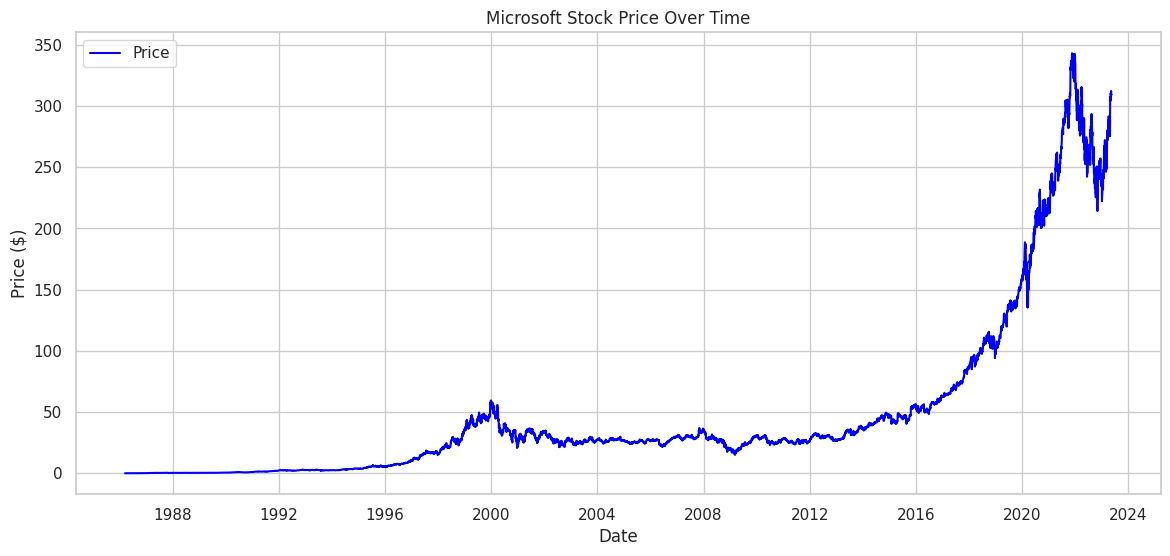

In [7]:
# ------------------------------
# 1) Line Chart: Price over Time
# ------------------------------
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='Price', color='blue')
plt.title('Microsoft Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

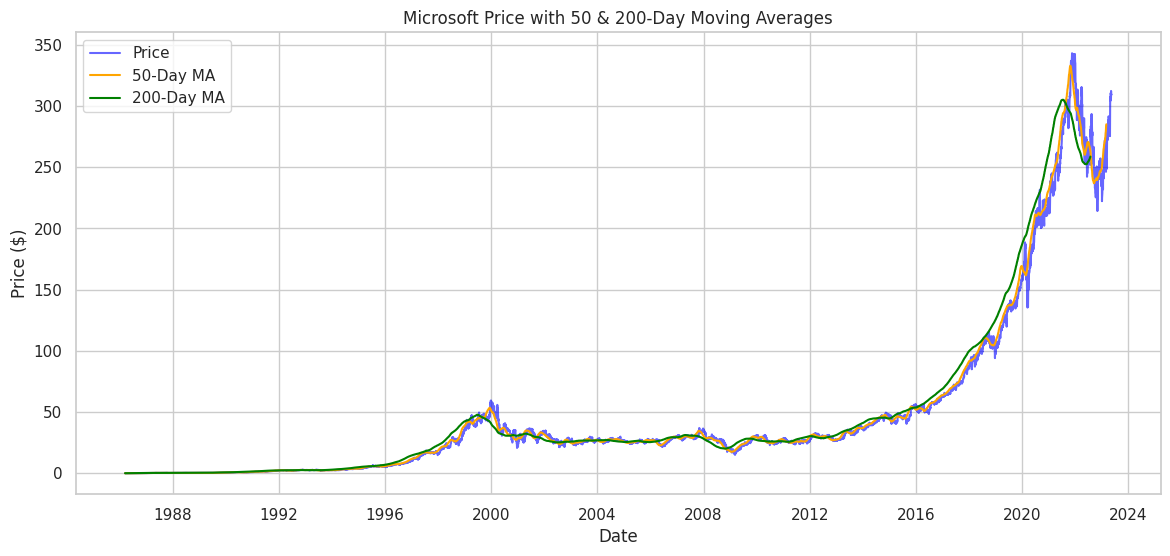

In [8]:
# ------------------------------
# 2) Price with Moving Averages
# ------------------------------
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title('Microsoft Price with 50 & 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

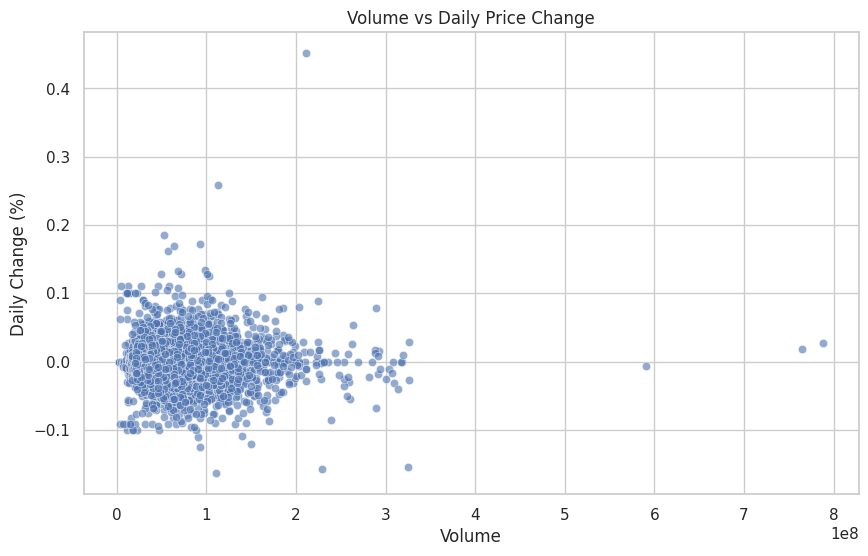

In [9]:
# ------------------------------
# 3) Scatter: Volume vs Daily Change
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(x='Volume', y='Daily_Change', data=df, alpha=0.6)
plt.title('Volume vs Daily Price Change')
plt.xlabel('Volume')
plt.ylabel('Daily Change (%)')
plt.show()

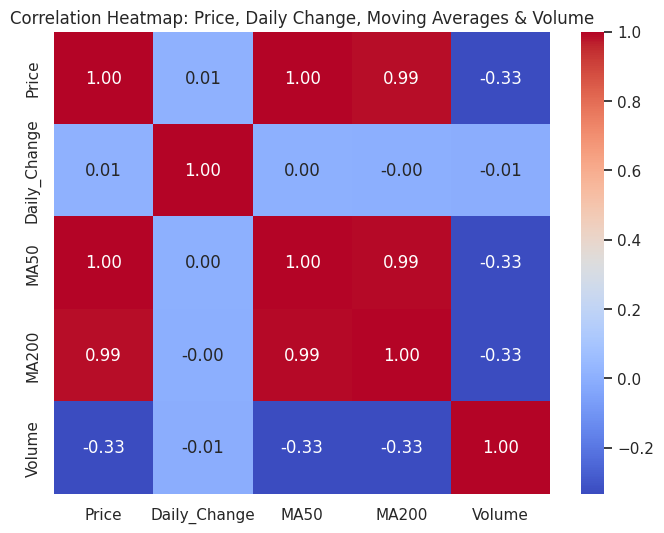

In [10]:
# ------------------------------
# 4) Correlation Heatmap
# ------------------------------
corr_cols = ['Price', 'Daily_Change', 'MA50', 'MA200', 'Volume']
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price, Daily Change, Moving Averages & Volume')
plt.show()